In [222]:
#Import CSV Adult_income.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv(r'adult_income.csv', parse_dates=True)
dataset.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [223]:
dataset.isnull().any()

age               False
workclass         False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
country           False
salary            False
dtype: bool

In [224]:
dataset.drop_duplicates()

# Dropping rows with ? in them
dataset = dataset[(dataset != ' ?').all(axis=1)]
dataset = dataset[(dataset != '?').all(axis=1)]

In [225]:
uniqueWorkclass = dataset['workclass'].unique()
uniqueMaritalStatus = dataset['marital-status'].unique()
uniqueOccupation = dataset['occupation'].unique()
uniqueRelationship = dataset['relationship'].unique()
uniqueRace = dataset['race'].unique()
uniqueSex = dataset['sex'].unique()
uniqueCountry = dataset['country'].unique()
print(uniqueWorkclass)

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()

dataset['workclass'] = labelencoder_X.fit_transform(dataset['workclass']) # ohe
dataset['marital-status'] = labelencoder_X.fit_transform(dataset['marital-status']) # ohe
dataset['occupation'] = labelencoder_X.fit_transform(dataset['occupation']) # ohe
dataset['relationship'] = labelencoder_X.fit_transform(dataset['relationship']) # ohe
dataset['race'] = labelencoder_X.fit_transform(dataset['race']) # ohe
dataset['sex'] = labelencoder_X.fit_transform(dataset['sex'])
dataset['country'] = labelencoder_X.fit_transform(dataset['country']) # ohe
dataset['salary'] = labelencoder_X.fit_transform(dataset['salary']) # ohe

# Allows us to see what the numbers mean
#labelencoder_X.inverse_transform(dataset['workclass'])

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


<Axes: xlabel='age', ylabel='salary'>

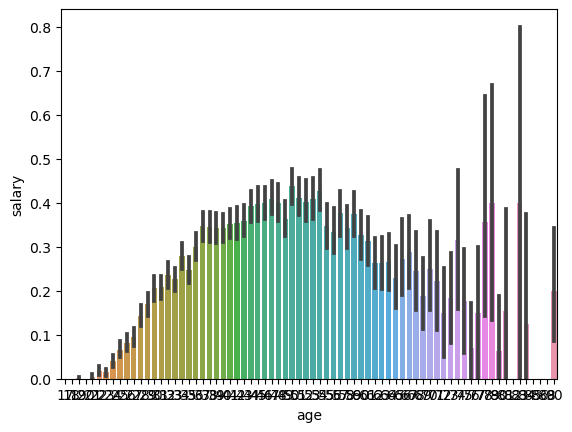

In [226]:
dataset.head(5)

# Plot graph of salary vs age
sns.barplot(x='age', y='salary', data=dataset)


C:\Users\ajayv\AppData\Local\Temp\ipykernel_11712\2348321461.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r', linewidths=0.5)


Text(0.5, 1.0, 'Correlation between variables')

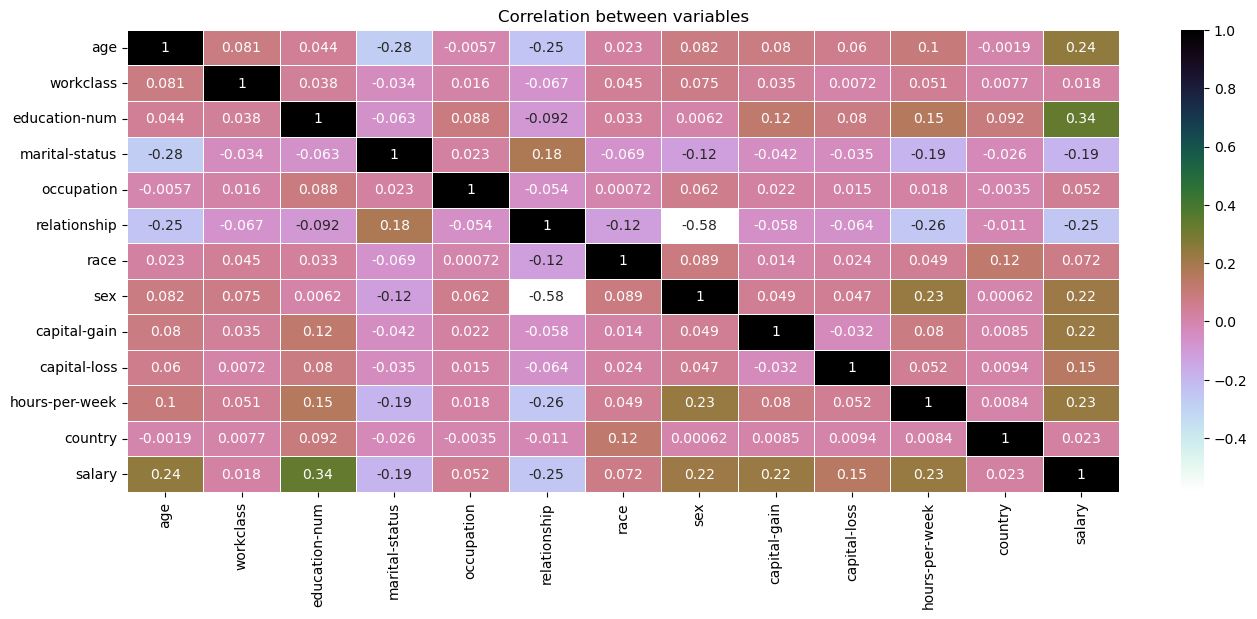

In [227]:
# Create figure
plt.figure(figsize=(16, 6))

# Creating the heatmap to see the correlation between the variables and salary
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r', linewidths=0.5)
plt.title('Correlation between variables')
